# Models 
-------

In this notebook, we will learn about mathematical models.

# The Problem 
-------

In school, students are taught to draw lines like the following

*y=2x+1*

They're taught to pick two values for  and calculate the corresponding values for  using the equation. Then they draw a set of axes, plot the points, and then draw a line extending through the two dots on their axes.

In [1]:
# Import matplotlib.
import matplotlib.pyplot as plt

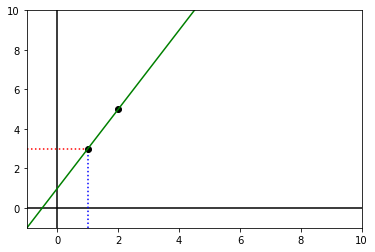

In [2]:
# Draw some axes.
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')

# Plot the two points (1,3) and (2,5).
plt.plot([1, 2], [3, 5], 'ko')
# Join them with an (extending) green lines.
plt.plot([-1, 10], [-1, 21], 'g-')

# Set some reasonable plot limits.
plt.xlim([-1, 10])
plt.ylim([-1, 10])

# Show the plot.
plt.show()

Simple linear regression is about the opposite problem - what if you have some points and are looking for the equation?

It's easy when the points are perfectly on a line already, but usually real-world data has some noise.

The data might still look roughly linear, but aren't exactly so.

# A Contrived Example
---

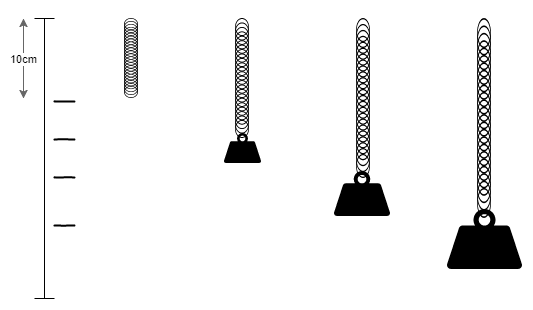

### Scenario

Suppose you are trying to weigh your suitcase to avoid an airline's extra charges. 

You don't have a weighing scales, but you do have a spring and some gym-style weights of masses 7KG, 14KG and 21KG.

You attach the spring to the wall hook, and mark where the bottom of it hangs.

You then hang the 7KG weight on the end and mark where the bottom of the spring is.

You repeat this with the 14KG weight and the 21KG weight.

Finally, you place your case hanging on the spring, and the spring hangs down halfway between the 7KG mark and the 14KG mark.

Is your case over the 10KG limit set by the airline?

### Hypothesis

When you look at the marks on the wall, it seems that the 0KG, 7KG, 14KG and 21KG marks are evenly spaced.

You wonder if that means your case weighs 10.5KG.

That is, you wonder if there is a linear relationship between the distance the spring's hook is from its resting position, and the mass on the end of it.

### Experiment

You decide to experiment.

You buy some new weights - a 1KG, a 2KG, a 3Kg, all the way up to 20KG.

You place them each in turn on the spring and measure the distance the spring moves from the resting position.

You tabulate the data and plot them.

### Analysis

Here we'll import the Python libraries we need for or investigations below.

In [3]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

Ignore the next couple of lines where I fake up some data. I'll use the fact that I faked the data to explain some results later. Just pretend that w is an array containing the weight values and d are the corresponding distance measurements.

In [4]:
# x= w
# y= d
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

In [5]:
# Let's have a look at w.
w

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [6]:
# Let's have a look at d.
d

array([ 10.04719031,  14.81268546,  28.48762707,  27.8227667 ,
        36.5127824 ,  37.60030742,  47.90767565,  43.60125603,
        53.90092477,  53.50494098,  60.5143052 ,  65.31140974,
        75.63143312,  70.50927133,  79.77845758,  86.51359996,
        88.33516198,  87.48778765, 100.9972681 , 109.42863645,
       104.84248209])

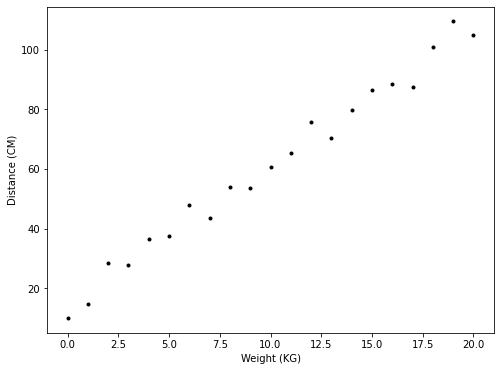

In [7]:
# Create the plot.

plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

### Model

It looks like the data might indeed be linear.

The points don't exactly fit on a straight line, but they are not far off it.

We might put that down to some other factors, such as the air density, or errors, such as in our tape measure.

Then we can go ahead and see what would be the best line to fit the data.

### Straight Lines

All straight lines can be expressed in the form ***y=mx+C***.

The number **m** is the slope of the line.

The slope is how much  increases by when  is increased by 1.0.

The number **c**  is the y-intercept of the line.

It's the value of **y** when **x** is 0.

### Fitting the Model

To fit a straight line to the data, we just must pick values for **m** and **c** .

These are called the parameters of the model, and we want to pick the best values possible for the parameters.

That is, the best parameter values *given* the data observed.

Below we show various lines plotted over the data, with different values for **m** and **c**.

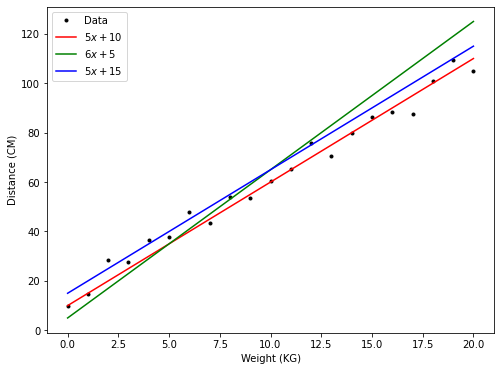

In [8]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

### Calculating the Cost

Here *(Xi,Yi)* is the *ith* point in the data set and *sigma i* means to sum over all points.

The values of *m* and *c* are to be determined.

We usually denote the above as **Cost(m,c)**.

Where does the above calculation come from?

It's easy to explain the part in the brackets .

The corresponding value to  in the dataset is *Yi* .

These are the measured values.

The value *MXi +C* is what the model says *Yi* should have been.

The difference between the value that was observed *(Yi)* and the value that the model gives *(mx+C)*, is *Yi-mXi-C* .

### Why square the value?

Well note that the value could be positive or negative, and you sum over all of these values.

If we allow the values to be positive or negative, then the positive could cancel the negatives.

So, the natural thing to do is to take the absolute value **y = mx +C**.

Well it turns out that absolute values are a pain to deal with, and instead it was decided to just square the quantity instead, as the square of a number is always positive.

There are pros and cons to using the square instead of the absolute value, but the square is used.

This is usually called least squares fitting.

In [9]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   372.16
Cost with m =  6.00 and c =  5.00:  1899.27
Cost with m =  5.00 and c = 15.00:   661.68


### Minimising the cost

We want to calculate values of  and  that give the lowest value for the cost value above.

For our given data set we can plot the cost value/function.

Recall that the cost is:

This is a function of two variables, **m**  and **c**, so a plot of it is three dimensional.

See the Advanced section below for the plot.

In the case of fitting a two-dimensional line to a few data points, we can easily calculate exactly the best values of **m** and **c**.

Some of the details are discussed in the *Advanced* section, as they involve calculus, but the resulting code is straight-forward.

We first calculate the mean (average) values of our **x** values and that of our **y** values.

Then we subtract the mean of **x**  from each of the **x**  values, and the mean of **y** from each of the **y** values. *(normalise)*

Then we take the dot product of the new **x** values and the new **y** values and divide it by the dot product of the new **x** values with themselves.

That gives us **m**, and we use **m** to calculate **c** .

Remember that in our dataset **x**  is called **w** (for weight) and **y** is called **d** (for distance).

We calculate **m** and **c** below.

In [10]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.696369 and c is 14.157642.


Note that numpy has a function that will perform this calculation for us, called polyfit. It can be used to fit lines in many dimensions.

In [11]:
np.polyfit(w, d, 1)

array([ 4.69636903, 14.15764163])

## Best fit Line

So, the best values for **m**  and **c** given our data and using least squares fitting are about **4.95** for **m** and about **11.13** for **c**.

We plot this line on top of the data below.

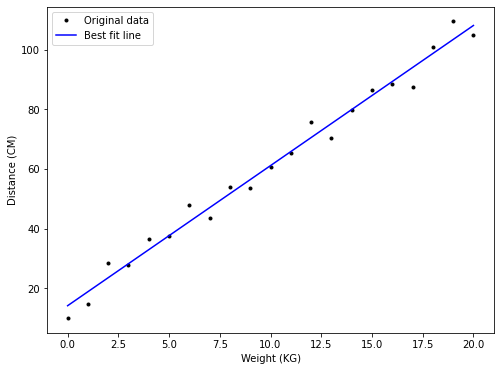

In [12]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

Note that the  of the best  and best  is not zero in this case.

In [13]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  4.70 and c = 14.16:   274.76


### Exercise 1

<span style='color:blue'>Remember to do these exercises in your own notebook in your assessment repository.</span>

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.



### Optimisation
---

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [14]:
# Optimization.
import scipy.optimize as so

# Numerical arrays.
import numpy as np

In [15]:
# Fix x values 
x = np.arange(0.0, 21.0, 1.0)

# Fix x values 
y  = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

x,y


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([  7.77661221,  18.75277649,  21.68535507,  17.6315171 ,
         30.66743391,  35.97928241,  40.23585971,  45.4760622 ,
         49.45460099,  50.73043962,  57.16515043,  60.08336618,
         63.80652788,  76.00523852,  83.76702141,  83.69485115,
         83.68371459,  89.69945415, 103.41513027, 100.77758809,
        115.34015976]))

In [16]:
#we are going to use the minimize function in scipy.optimize

# what we need:
# 1. A function to minimize  
# takes in x
# x Intiial guess -array of real elements of size n  [array of n values]
# fun = function = cost
# def cost(m,c) - see here we have two inputs.  Need to have just one i.e. 'mc'

# remember x and y have fixed values in this scenario

# The function to be minimised is:
def cost(MC):
    m,c = MC
    
    # we will put the values in an array called MC. e.g. MC =(5,10)
    # unpact the values m & c
    # we need the data points in this function. Note numpy is celever enought to recognise X and Y as array and will multiply using x array values
    cost = np.sum((y-m * x - c)**2)
    #return that value
    return cost
    


In [17]:
# run a quick test
cost ((5.0,10.0))

309.8486361178043

## My work

In [18]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

# import scipy.optimize as so
result = so.minimize(cost, (2.0, 2.0))
#Show the results
result

      fun: 281.6334145595101
 hess_inv: array([[ 0.00064935, -0.00649351],
       [-0.00649351,  0.08874461]])
      jac: array([-3.81469727e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.97742469, 9.07471226])

The minimum value for the function scipy.optimize found was 281.63 (when run) <br>
Optimiozation terminated successfully- 9 times of 10 it doesnt terminate successfully. <br>
These are contrived input data

## My work

In [19]:
# Fix x values.
x = np.arange(0.0, 21.0, 1.0)

# Fix y values.
y = 5.0 * x + 10.0 + np.random.normal(0.0, 5.0, x.size)

# Print them out.
x, y

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([ 17.64408272,   9.85610521,  22.54279508,  24.38772614,
         31.33592224,  38.98293326,  34.11401837,  47.88038598,
         52.11987117,  54.62257839,  56.96758298,  62.81087463,
         66.61293672,  82.21070909,  82.59491981,  80.00901931,
         86.13893159,  90.3774026 ,  94.74578168,  98.48027153,
        100.72138601]))

In [20]:
# We are going to use minimize function in scipy.optimize.
# So - what do we need? First we need a function to minimze.

# x and y are have fixed values in this scenario as above.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [21]:
# Run a quick test.
cost((5.0, 10.0))

458.5389363434375

## Course Notes

In [22]:
# neural networks used 'gradient descent' 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 301.08450235459185
 hess_inv: array([[ 0.00064935, -0.00649351],
       [-0.00649351,  0.08874457]])
      jac: array([3.81469727e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 4.59218134, 12.89515007])

In [ ]:
# from scipy X: array ([]) are the two values of x that would minimize the cost

In [23]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(4.592181342968509, 12.895150072922746)

In [24]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(4.5921813590615965, 12.895149957257281)

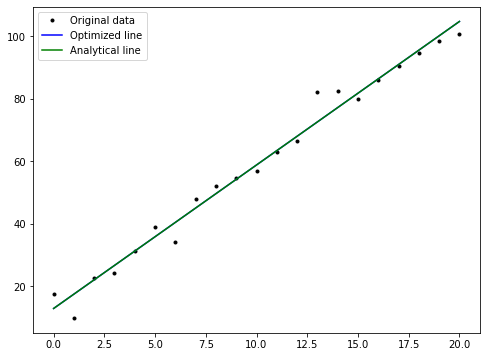

In [25]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
# call the point m underscore o for optimised value
# call the point c underscore o for optimised value
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line') #calculated using the scipy.stats optimized,minimize function
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line') #calculated using the basic np.polyfit function above
ax.legend()

# Show the plot.
plt.show()

In [ ]:
# when compare the analytical result to the optimised result - two lines are so closely aligned
# optimised and analytical line pretty much giving the same result
# minimised function doesnt rely on diffrentiating the cost funvtions m  & c -diffrentiation
# instead it starts with best estimate of m & c  (or does it need these to be accurate?)
# basically works on the curve in iterative way
# is there a way to change M & C a little bit so that it moevs down the slope of the cost function
# uses an iterative function
# so long as smaller value- it keeps going (recursive?)
# then it returns the result

# neural networks used 'gradient descent' 

# whereas analytical function look at whole cost function- partial derivatives-solve simultaneous equation.
# Involved- Tiresome.  Not always possible beyond a simple cost function

get hands dirty using scipy <br>
create some random data <br>
use numpy polyfit to get values of x <br>
use scipy.optimize.minimize to calculate x <br>
compare the values <br>
plot some data <br>
discuss

### Curve Fitting
---

In [26]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
#curve fitting takes  in a function
# curve_fitting tries to minimize the sum of the squared residuals (i.e. predicted -actual) squared and summed
# call the function 'f'
# tell the curve.fitting funvtion that our model function is f
def f(x, m, c):
    return m * x + c
# e.g. y = mx +C

In [27]:
# Run curve_fit.
# input the values of x & y created randomly above
result = so.curve_fit(f, x, y)

In [28]:
# Run curve_fit.
result = so.curve_fit(f, x, y)

In [29]:
# Pull out the parameters.
# call them m_f and c_f
# curve_fit line
m_f, c_f = result[0]
# Print values.
m_f, c_f

(4.592181359069432, 12.895149957283225)

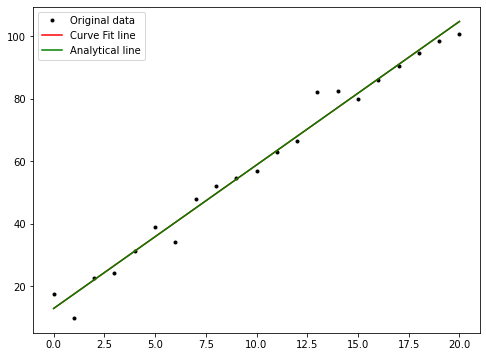

In [30]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

### Exercise 2
---

<span style='color:green'>**Remember to do these exercises in your own notebook in your assessment repository.**</span>

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

In [31]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
